In [ ]:
Getting data

In [4]:
import pandas as pd
url = "C:/Users/Vishali/student_dataset_sparks_foundation.csv"
student_data = pd.read_csv(url)
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting 

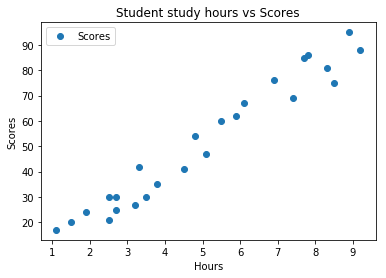

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
student_data.plot('Hours','Scores',style='o')
plt.title("Student study hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [ ]:
Splitting data

In [6]:
x = student_data.iloc[:,:-1]
x.values

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
y = student_data.iloc[:,1]
y.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [8]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)
print("training dataset for hours ",x_train)
print("testing dataset for hours ",x_test)
print("training dataset for scores",y_train)
print("testing dataset for scores",y_test)

training dataset for hours      Hours
22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5
testing dataset for hours      Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
training dataset for scores 22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64
testing dataset for scores 5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


In [ ]:
Training data

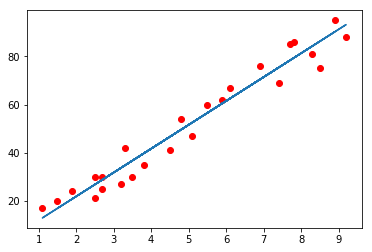

In [9]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
slope = regressor.coef_
intercept = regressor.intercept_
eqnline = slope *x+intercept
plt.scatter(x,y,color='red')
plt.plot(x,eqnline)
plt.show()

In [10]:
print("Training complete")

Training complete


In [ ]:
Predicting data

In [11]:
print(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [14]:
y_pred = regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [16]:
hours =[[9.25]] 
score_pred = regressor.predict(hours)
print("Number of hours = ",hours[0][0])
print("Predicted score = ",score_pred[0])

Number of hours =  9.25
Predicted score =  93.69173248737538


In [ ]:
Evaluating model

In [17]:
from sklearn import metrics
print("Mean absolute error = ",metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error =  4.183859899002975


In [18]:
r2_score = regressor.score(x,y)
print("Coefficient of determination = ",r2_score)

Coefficient of determination =  0.9526947647057274


In [19]:
mse = metrics.mean_squared_error(y_test,y_pred)
print("Mean squared error = ",mse)

Mean squared error =  21.5987693072174


In [21]:
import numpy as np
rmse = np.sqrt(mse)
print("Root mean squared error = ",rmse)

Root mean squared error =  4.6474476121003665


In [22]:
var = regressor.score(x_test,y_test)
print("Variance = ",var)

Variance =  0.9454906892105356
